<a href="https://colab.research.google.com/github/VitikaJain25/PandasRevision/blob/master/LoadingCleaningAndPreparingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.6.9


In [0]:
import matplotlib
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
from google.colab import files  #To read file from local
import io
uploaded = files.upload()   # To upload file from local.

crude_oil_data = pd.read_csv(io.BytesIO(uploaded['U.S._crude_oil_production.csv']))

Saving U.S._crude_oil_production.csv to U.S._crude_oil_production.csv


In [4]:
crude_oil_data.head(10)

,Month,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,Florida,Idaho,Illinois,Indiana,Kansas,Kentucky,Louisiana,Michigan,Mississippi,Missouri,Nebraska,Montana,Nevada,New Mexico,New York,North Dakota,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
0,2008-06-01,5138,21,655,17,0,583,82,1326,67,5,0,26,5,107,5,215,17,65,0,6,86,1,161,1,165,14,186,8,5,144,6,0,60,1097,1
1,2008-07-01,5177,21,640,17,0,586,81,1372,61,6,0,27,5,103,7,214,17,60,0,6,84,1,163,1,172,14,184,8,5,145,5,0,61,1111,1
2,2008-08-01,5003,21,544,17,0,588,82,1272,70,5,0,26,5,110,10,203,17,59,0,7,84,1,163,1,178,14,188,8,5,145,6,0,62,1110,1
3,2008-09-01,3974,21,681,16,0,587,88,242,67,5,0,27,6,116,4,113,17,60,0,7,86,1,157,1,189,14,186,8,5,144,6,0,63,1055,1
4,2008-10-01,4738,21,716,17,0,586,86,803,66,6,0,26,6,111,8,186,17,64,0,7,86,1,169,1,203,14,185,8,5,145,6,0,64,1125,1
5,2008-11-01,5078,22,728,17,0,586,87,1090,66,6,0,25,5,111,11,198,17,61,0,7,86,1,171,1,214,14,181,8,5,147,5,0,66,1141,1
6,2008-12-01,5103,22,702,17,0,579,83,1197,68,4,0,25,5,110,4,194,20,63,0,7,83,1,171,1,201,14,176,8,5,143,5,0,62,1134,1
7,2009-01-01,5138,21,679,16,0,579,85,1281,67,2,0,23,4,112,10,188,17,62,0,7,81,1,171,1,187,13,173,8,5,144,3,0,65,1133,1
8,2009-02-01,5236,21,708,16,0,575,87,1323,65,2,0,25,5,112,7,192,18,62,0,7,82,1,175,1,191,13,193,8,5,143,3,0,66,1128,1
9,2009-03-01,5210,20,709,16,0,577,86,1355,40,2,0,27,5,108,5,190,17,62,0,6,81,1,173,1,194,13,177,8,5,140,6,0,65,1118,1


In [5]:
crude_oil_data.tail(10)

,Month,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,Florida,Idaho,Illinois,Indiana,Kansas,Kentucky,Louisiana,Michigan,Mississippi,Missouri,Nebraska,Montana,Nevada,New Mexico,New York,North Dakota,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
111,2017-09-01,9495,18,482,14,0,469,399,1693,15,4,0,23,5,95,7,139,15,49,0,6,56,1,497,1,1096,56,469,19,4,215,26,0,97,3525,1
112,2017-10-01,9703,18,507,14,0,469,409,1477,15,5,0,22,5,97,0,135,15,47,0,6,55,1,519,1,1184,54,497,22,4,221,30,0,97,3776,1
113,2017-11-01,10103,18,510,14,0,468,421,1689,15,5,0,23,5,99,8,142,15,48,0,6,55,1,522,1,1197,57,501,21,4,226,32,0,97,3903,1
114,2017-12-01,10040,17,512,14,0,461,436,1576,13,5,0,23,5,92,10,138,15,46,0,6,54,1,537,1,1183,53,504,20,3,225,31,0,94,3963,1
115,2018-01-01,9995,16,508,14,0,463,436,1631,14,5,0,19,4,93,2,122,15,45,0,5,56,1,541,1,1158,50,530,17,4,222,28,0,100,3894,1
116,2018-02-01,10248,17,513,14,0,463,428,1704,14,5,0,22,5,96,4,131,15,48,0,5,56,1,586,1,1151,54,527,18,4,223,27,0,100,4015,1
117,2018-03-01,10461,17,512,14,0,462,428,1681,16,5,0,23,5,97,12,131,14,47,0,6,53,1,623,1,1145,54,543,18,4,231,29,0,104,4185,1
118,2018-04-01,10475,17,497,14,0,465,447,1583,16,5,0,22,4,97,4,128,13,47,0,5,54,1,650,1,1211,54,531,19,4,232,29,0,103,4222,1
119,2018-05-01,10443,16,496,14,0,464,447,1504,15,5,0,24,5,97,7,130,14,48,0,5,54,1,652,1,1236,58,529,19,3,228,29,0,97,4245,1
120,2018-06-01,10674,16,451,14,0,462,423,1658,15,5,0,23,5,96,9,129,15,47,0,5,52,1,657,1,1220,65,526,18,4,226,30,0,94,4410,1


In [6]:
crude_oil_data.shape

(121, 36)

In [7]:
crude_oil_data.columns
# Shows Data for total US oil production and then for individual states like Alabama, Alaska etc

Index(['Month', 'U.S. Crude Oil ', 'Alabama', 'Alaska', 'Arkansas', 'Arizona',
       'California', 'Colorado', 'Federal Offshore Gulf of Mexico Crude Oil',
       'Federal Offshore Pacific Crude Oil', 'Florida', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi',
       'Missouri', 'Nebraska', 'Montana', 'Nevada', 'New Mexico', 'New York',
       'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Dakota',
       'Wyoming', 'West Virginia', 'Virginia', 'Utah', 'Texas', 'Tennessee'],
      dtype='object')

In [8]:
# To check if any of the states has a production of 0
crude_oil_data.columns[(crude_oil_data.sum(axis = 0)) == 0]

Index(['Arizona', 'Virginia'], dtype='object')

In [9]:
# For 2 states the sum of column is 0. So we may remove both the columns
crude_oil_data.drop(['Arizona','Virginia'], axis = 1, inplace=True)
crude_oil_data.columns

Index(['Month', 'U.S. Crude Oil ', 'Alabama', 'Alaska', 'Arkansas',
       'California', 'Colorado', 'Federal Offshore Gulf of Mexico Crude Oil',
       'Federal Offshore Pacific Crude Oil', 'Florida', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi',
       'Missouri', 'Nebraska', 'Montana', 'Nevada', 'New Mexico', 'New York',
       'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Dakota',
       'Wyoming', 'West Virginia', 'Utah', 'Texas', 'Tennessee'],
      dtype='object')

In [10]:
crude_oil_data.shape

(121, 34)

In [11]:
# Converting Month column to Date time format and storing in new column 'Date'
crude_oil_data['Date'] = pd.to_datetime(crude_oil_data['Month'])
crude_oil_data['Date'].head(10)

0   2008-06-01
1   2008-07-01
2   2008-08-01
3   2008-09-01
4   2008-10-01
5   2008-11-01
6   2008-12-01
7   2009-01-01
8   2009-02-01
9   2009-03-01
Name: Date, dtype: datetime64[ns]

In [12]:
# Dropping Month column as the same data is present in Date column now
crude_oil_data.drop(['Month'], axis = 1, inplace=True)
crude_oil_data.columns

Index(['U.S. Crude Oil ', 'Alabama', 'Alaska', 'Arkansas', 'California',
       'Colorado', 'Federal Offshore Gulf of Mexico Crude Oil',
       'Federal Offshore Pacific Crude Oil', 'Florida', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi',
       'Missouri', 'Nebraska', 'Montana', 'Nevada', 'New Mexico', 'New York',
       'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Dakota',
       'Wyoming', 'West Virginia', 'Utah', 'Texas', 'Tennessee', 'Date'],
      dtype='object')

In [13]:
# Renaming columns with long names
# Shorter column names will help with visualization that we plot
crude_oil_data = crude_oil_data.rename(columns = {'Federal Offshore Gulf of Mexico Crude Oil' : 'Mexico',
                                        'Federal Offshore Pacific Crude Oil' : 'Pacific'})
crude_oil_data.columns


Index(['U.S. Crude Oil ', 'Alabama', 'Alaska', 'Arkansas', 'California',
       'Colorado', 'Mexico', 'Pacific', 'Florida', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi',
       'Missouri', 'Nebraska', 'Montana', 'Nevada', 'New Mexico', 'New York',
       'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Dakota',
       'Wyoming', 'West Virginia', 'Utah', 'Texas', 'Tennessee', 'Date'],
      dtype='object')

In [14]:
# Extracting important features from 'Date' data. Extracting 'Year' information
crude_oil_data['Year'] = crude_oil_data['Date'].dt.year
crude_oil_data['Year'].sample(10)

7      2009
117    2018
26     2010
104    2017
90     2015
91     2016
59     2013
87     2015
2      2008
79     2015
Name: Year, dtype: int64

In [15]:
# Extracting important features from 'Date' data. Extracting 'Month' information
crude_oil_data['Month'] = crude_oil_data['Date'].dt.month
crude_oil_data['Month'].sample(10)

72      6
52     10
40     10
41     11
116     2
22      4
28     10
68      2
29     11
67      1
Name: Month, dtype: int64

In [16]:
# Descriptive Statistics for Numeric Data.
crude_oil_data.describe()

,U.S. Crude Oil,Alabama,Alaska,Arkansas,California,Colorado,Mexico,Pacific,Florida,Idaho,Illinois,Indiana,Kansas,Kentucky,Louisiana,Michigan,Mississippi,Missouri,Nebraska,Montana,Nevada,New Mexico,New York,North Dakota,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Utah,Texas,Tennessee,Year,Month
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.00000,121.0,121.000000,121.0,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.0,121.000000,121.000000
mean,7423.694215,22.958678,540.404959,16.462810,536.388430,212.115702,1444.264463,43.115702,5.190083,0.066116,25.008264,5.619835,114.520661,7.041322,177.404959,18.016529,62.355372,0.223140,6.966942,71.53719,1.0,305.495868,1.0,746.380165,33.322314,321.611570,13.876033,4.504132,180.429752,16.471074,85.148760,2403.826446,1.0,2012.958678,6.495868
std,1801.581601,3.773585,73.691879,1.483472,33.228595,117.403165,216.197200,18.735523,1.273539,0.249517,1.744018,0.915207,12.587096,2.936542,22.316503,2.915429,7.282238,0.418083,1.175683,9.55165,0.0,128.069846,0.0,374.123158,22.429971,119.141958,4.497352,0.564564,34.097367,10.968952,16.662163,1025.413694,0.0,2.950697,3.452352
min,3974.000000,16.000000,398.000000,14.000000,461.000000,81.000000,242.000000,13.000000,2.000000,0.000000,19.000000,4.000000,92.000000,0.000000,113.000000,0.000000,45.000000,0.000000,4.000000,52.00000,1.0,157.000000,1.0,165.000000,13.000000,152.000000,8.000000,3.000000,137.000000,3.000000,59.000000,1055.000000,1.0,2008.000000,1.000000
25%,5555.000000,20.000000,497.000000,15.000000,534.000000,97.000000,1322.000000,18.000000,5.000000,0.000000,24.000000,5.000000,106.000000,5.000000,162.000000,16.000000,60.000000,0.000000,6.000000,65.00000,1.0,188.000000,1.0,343.000000,13.000000,201.000000,9.000000,4.000000,147.000000,6.000000,71.000000,1243.000000,1.0,2010.000000,4.000000
50%,7355.000000,22.000000,523.000000,16.000000,544.000000,169.000000,1452.000000,51.000000,6.000000,0.000000,25.000000,5.000000,112.000000,7.000000,186.000000,19.000000,65.000000,0.000000,7.000000,71.00000,1.0,285.000000,1.0,820.000000,18.000000,320.000000,13.000000,5.000000,174.000000,20.000000,85.000000,2533.000000,1.0,2013.000000,6.000000
75%,9085.000000,26.000000,582.000000,18.000000,559.000000,320.000000,1593.000000,56.000000,6.000000,0.000000,26.000000,6.000000,122.000000,9.000000,192.000000,20.000000,67.000000,0.000000,8.000000,80.00000,1.0,405.000000,1.0,1096.000000,53.000000,433.000000,18.000000,5.000000,209.000000,25.000000,97.000000,3301.000000,1.0,2015.000000,9.000000
max,10674.000000,29.000000,728.000000,19.000000,588.000000,447.000000,1775.000000,70.000000,7.000000,1.000000,28.000000,8.000000,143.000000,22.000000,215.000000,23.000000,73.000000,1.000000,10.000000,86.00000,1.0,657.000000,1.0,1236.000000,79.000000,543.000000,22.000000,5.000000,251.000000,39.000000,116.000000,4410.000000,1.0,2018.000000,12.000000


In [17]:
crude_oil_data.head(5)

,U.S. Crude Oil,Alabama,Alaska,Arkansas,California,Colorado,Mexico,Pacific,Florida,Idaho,Illinois,Indiana,Kansas,Kentucky,Louisiana,Michigan,Mississippi,Missouri,Nebraska,Montana,Nevada,New Mexico,New York,North Dakota,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Utah,Texas,Tennessee,Date,Year,Month
0,5138,21,655,17,583,82,1326,67,5,0,26,5,107,5,215,17,65,0,6,86,1,161,1,165,14,186,8,5,144,6,60,1097,1,2008-06-01,2008,6
1,5177,21,640,17,586,81,1372,61,6,0,27,5,103,7,214,17,60,0,6,84,1,163,1,172,14,184,8,5,145,5,61,1111,1,2008-07-01,2008,7
2,5003,21,544,17,588,82,1272,70,5,0,26,5,110,10,203,17,59,0,7,84,1,163,1,178,14,188,8,5,145,6,62,1110,1,2008-08-01,2008,8
3,3974,21,681,16,587,88,242,67,5,0,27,6,116,4,113,17,60,0,7,86,1,157,1,189,14,186,8,5,144,6,63,1055,1,2008-09-01,2008,9
4,4738,21,716,17,586,86,803,66,6,0,26,6,111,8,186,17,64,0,7,86,1,169,1,203,14,185,8,5,145,6,64,1125,1,2008-10-01,2008,10


Text(0.5, 1.0, 'U.S. Crude Oil Production')

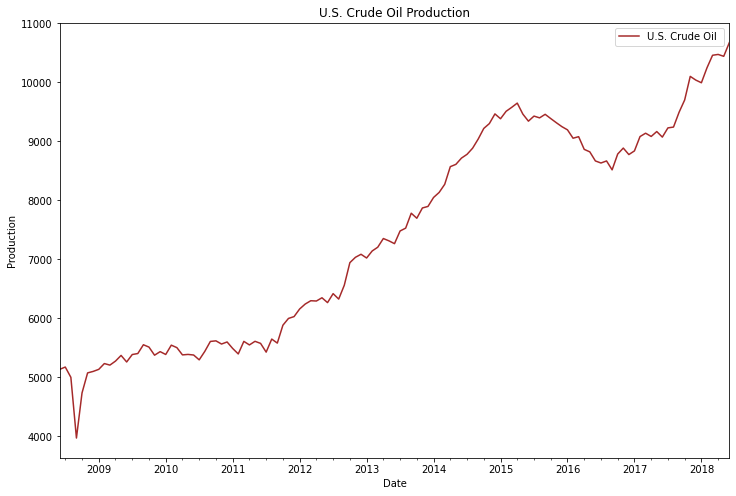

In [18]:
# Simple line plot representation, how oil production varied across the years
# Time Series representation
crude_oil_data.plot(x = 'Date', y= 'U.S. Crude Oil ', figsize = (12,8), color = 'brown')
plt.ylabel('Production')
plt.title('U.S. Crude Oil Production')

Text(0.5, 1.0, 'U.S. Crude Oil Production')

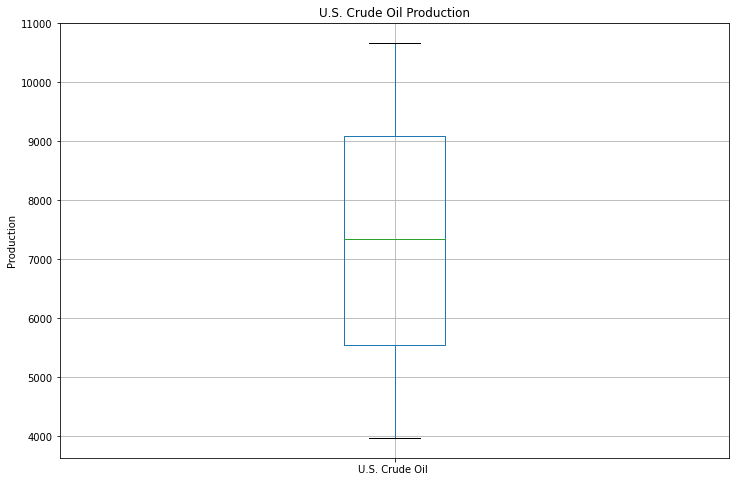

In [19]:
# Height of box gives us the IQR
crude_oil_data.boxplot('U.S. Crude Oil ', figsize = (12,8))
plt.ylabel('Production')
plt.title('U.S. Crude Oil Production')

Text(0.5, 1.0, 'California Crude Oil Production')

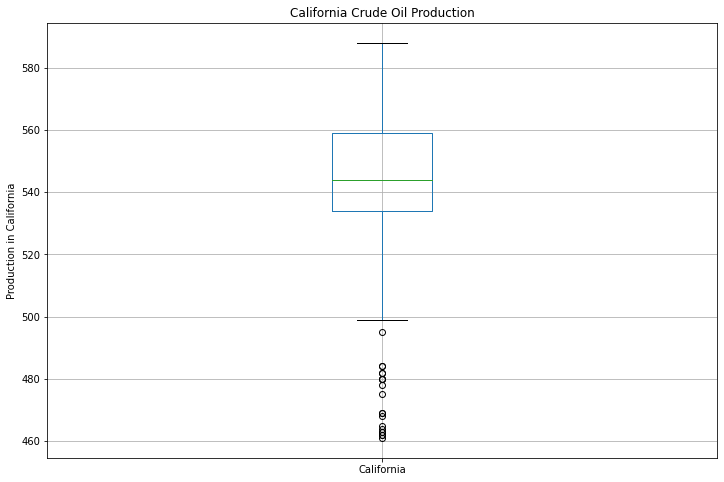

In [20]:
# Box plot representation for crude oil production for the state "California".
# Points below the whisker are outliers.
# For few months in California, crude oil production fell far below the normal range.
crude_oil_data.boxplot('California', figsize = (12,8))
plt.ylabel('Production in California')
plt.title('California Crude Oil Production')

Text(0.5, 1.0, 'Alaska, California Crude Oil Production')

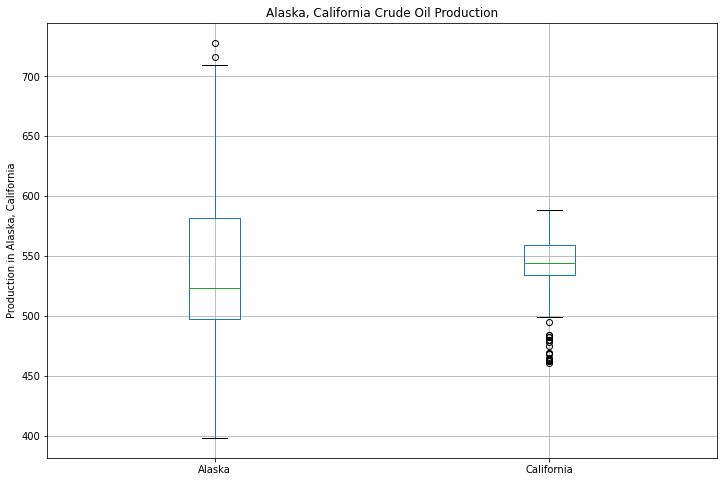

In [21]:
# Box plot being used to compare summary statistics of distribution for 2 columns in data.
crude_oil_data[['Alaska', 'California']].boxplot(figsize = (12,8))
plt.ylabel('Production in Alaska, California')
plt.title('Alaska, California Crude Oil Production')

# Alaska - We have Positive outliers
# California - We have negative outliers

Text(0.5, 1.0, 'US Crude Oil Production by Year')

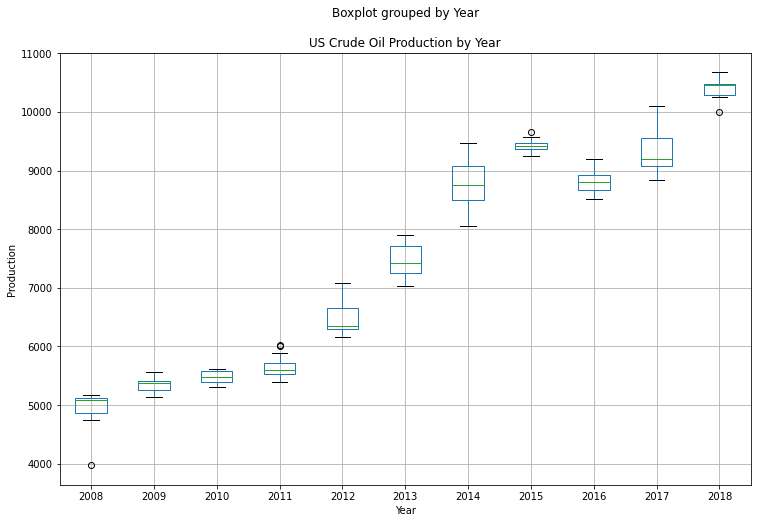

In [22]:
# Box plot of each year of production
crude_oil_data.boxplot('U.S. Crude Oil ', by = 'Year', figsize = (12,8))
plt.ylabel('Production')
plt.title('US Crude Oil Production by Year')

In [23]:
# Grouping on the basis of year column
year_data = crude_oil_data.groupby('Year', as_index=False).sum()
year_data[['Year', 'U.S. Crude Oil ']]

,Year,U.S. Crude Oil
0,2008,34211
1,2009,64180
2,2010,65741
3,2011,67829
4,2012,78007
5,2013,89585
6,2014,105064
7,2015,113179
8,2016,105970
9,2017,112205


Text(0.5, 1.0, 'U.S Crude Oil Production')

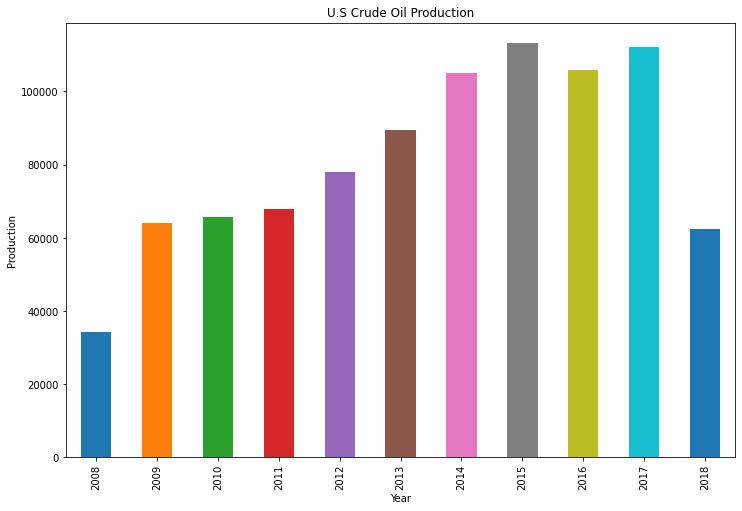

In [24]:
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
year_data.plot.bar(x = 'Year', y = 'U.S. Crude Oil ', figsize = (12,8), color = colors, legend = False)
plt.ylabel('Production')
plt.title('U.S Crude Oil Production')

In [25]:
# Average Crude Oil Production for Individual States
# Eliminating results for 1st column(US) and last 3 column (Month date year)
mean_prod_data = crude_oil_data.mean()[1:-3]
mean_prod_data

Alabama            22.958678
Alaska            540.404959
Arkansas           16.462810
California        536.388430
Colorado          212.115702
Mexico           1444.264463
Pacific            43.115702
Florida             5.190083
Idaho               0.066116
Illinois           25.008264
Indiana             5.619835
Kansas            114.520661
Kentucky            7.041322
Louisiana         177.404959
Michigan           18.016529
Mississippi        62.355372
Missouri            0.223140
Nebraska            6.966942
Montana            71.537190
Nevada              1.000000
New Mexico        305.495868
New York            1.000000
North Dakota      746.380165
Ohio               33.322314
Oklahoma          321.611570
Pennsylvania       13.876033
South Dakota        4.504132
Wyoming           180.429752
West Virginia      16.471074
Utah               85.148760
Texas            2403.826446
dtype: float64

In [26]:
# Sorting Data - Desending order of average oil production
mean_prod_data = mean_prod_data.sort_values(ascending=False)
mean_prod_data
# Oil production in Texas is the most

Texas            2403.826446
Mexico           1444.264463
North Dakota      746.380165
Alaska            540.404959
California        536.388430
Oklahoma          321.611570
New Mexico        305.495868
Colorado          212.115702
Wyoming           180.429752
Louisiana         177.404959
Kansas            114.520661
Utah               85.148760
Montana            71.537190
Mississippi        62.355372
Pacific            43.115702
Ohio               33.322314
Illinois           25.008264
Alabama            22.958678
Michigan           18.016529
West Virginia      16.471074
Arkansas           16.462810
Pennsylvania       13.876033
Kentucky            7.041322
Nebraska            6.966942
Indiana             5.619835
Florida             5.190083
South Dakota        4.504132
Nevada              1.000000
New York            1.000000
Missouri            0.223140
Idaho               0.066116
dtype: float64

In [27]:
# Creating new Dataframe
mean_prod_df = pd.DataFrame(mean_prod_data).reset_index()
mean_prod_df.columns = ['State', 'Production']
mean_prod_df.head(10)

,State,Production
0,Texas,2403.826446
1,Mexico,1444.264463
2,North Dakota,746.380165
3,Alaska,540.404959
4,California,536.388430
5,Oklahoma,321.611570
6,New Mexico,305.495868
7,Colorado,212.115702
8,Wyoming,180.429752
9,Louisiana,177.404959


Text(0, 0.5, 'Production')

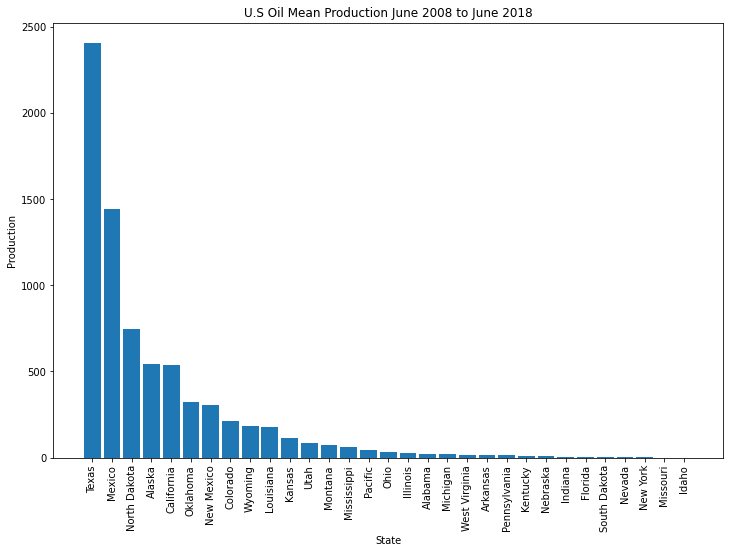

In [29]:
# Average Oil production for each state.
plt.figure(figsize = (12,8))
plt.bar(mean_prod_df['State'], mean_prod_df['Production'], width= 0.85)
plt.title('U.S Oil Mean Production June 2008 to June 2018')
plt.xticks(rotation = 90)
plt.xlabel('State')
plt.ylabel('Production')

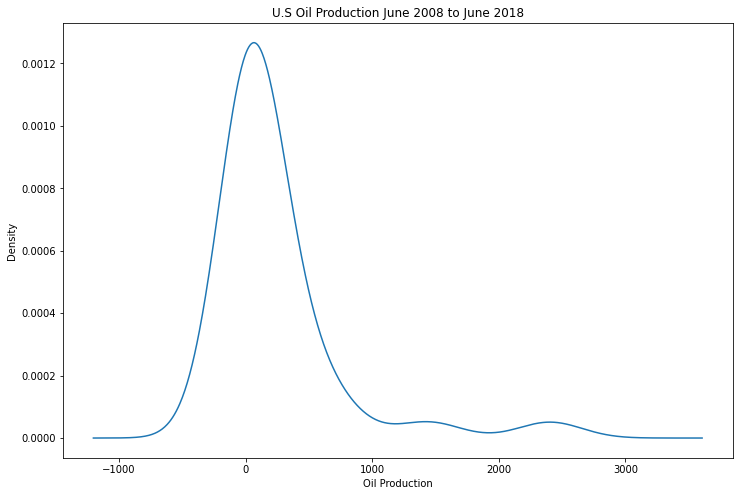

In [34]:
# Visualising in the form of probability density distribution.
mean_prod_df['Production'].plot.kde(figsize=(12,8))

plt.title('U.S Oil Production June 2008 to June 2018')
plt.xlabel('Oil Production')
plt.show()

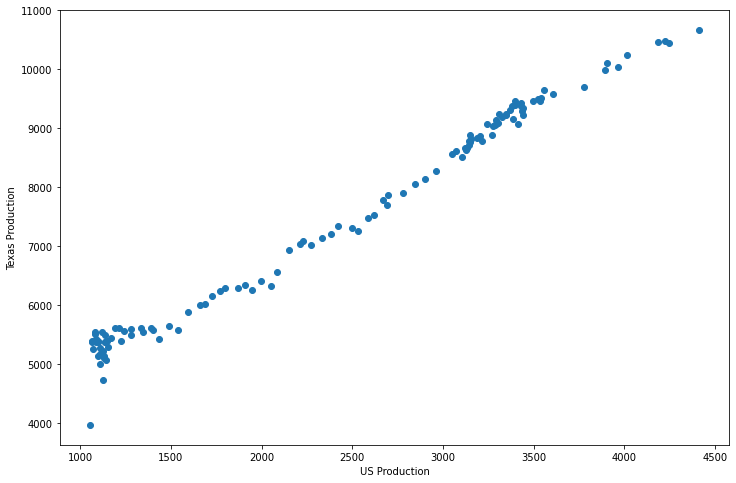

In [40]:
# Previously we saw that Texas has max oil production
# We will plot scatter plot of Texas vs US oil production
plt.figure(figsize=(12,8))
plt.scatter(crude_oil_data['Texas'], crude_oil_data['U.S. Crude Oil '])
plt.xlabel('US Production')
plt.ylabel('Texas Production')
plt.show()

# Shows a linear relationship
# shows how much Texas influences the Total oil Production in U.S
# Texas produces more oil, Entire US produces more oil.

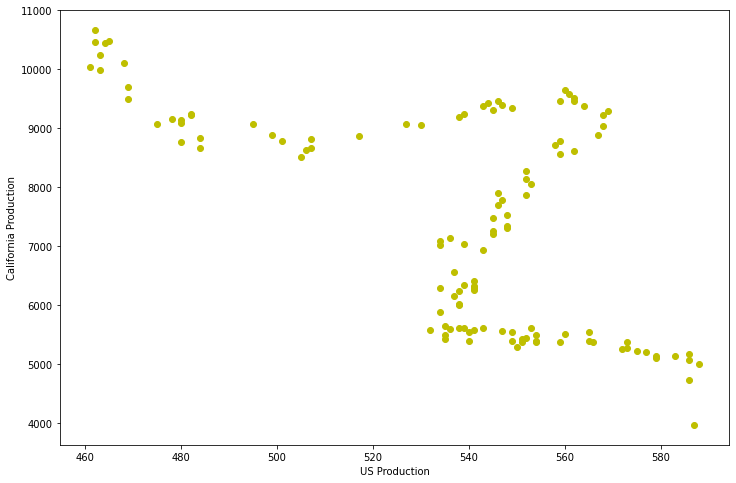

In [43]:
# We will plot scatter plot of California vs US oil production
plt.figure(figsize=(12,8))
plt.scatter(crude_oil_data['California'], crude_oil_data['U.S. Crude Oil '], c = 'y')
plt.xlabel('US Production')
plt.ylabel('California Production')
plt.show()

# No linear relationship
# Shows that total oil production in California doesn not effect the Total oil Production in U.S

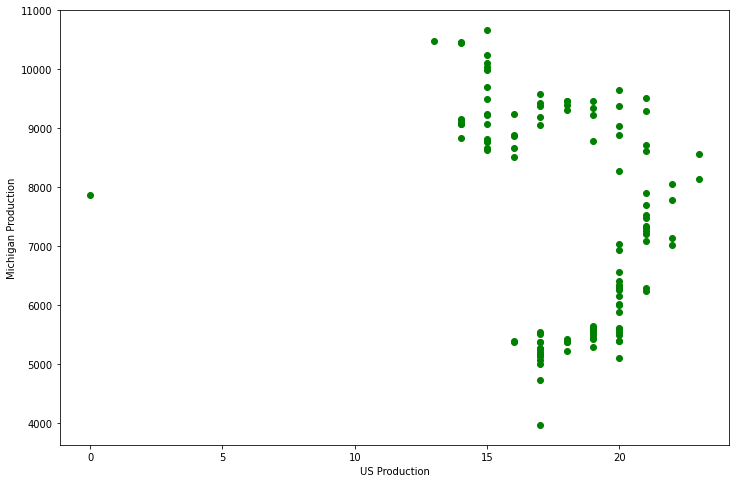

In [44]:
# We will plot scatter plot of Michigan vs US oil production
plt.figure(figsize=(12,8))
plt.scatter(crude_oil_data['Michigan'], crude_oil_data['U.S. Crude Oil '], c = 'g')
plt.xlabel('US Production')
plt.ylabel('Michigan Production')
plt.show()

# No linear relationship. No relationship at all
# Shows that total oil production in Michigan doesn not effect the Total oil Production in U.S